In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

!pip install metric-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import h5py

houston18_file = h5py.File('/content/drive/MyDrive/proje/Houston18.mat', 'r')
houston18_gt_file = h5py.File('/content/drive/MyDrive/proje/Houston18_7gt.mat', 'r')

data = np.array(houston18_file['ori_data'])
gt = np.array(houston18_gt_file['map'])


def applyPCA(X, numComponents=15):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX


data = np.transpose(data, (1, 2, 0))

data=applyPCA(data)

df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))
df['class'] = gt.ravel()

X = df[df['class']!=0].iloc[:, :-1].values

y = df[df['class']!=0].iloc[:, -1].values



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from metric_learn import NCA


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

nca = NCA(max_iter=100,verbose=True)
knn = KNeighborsClassifier(n_neighbors=5)

nca.fit(X_train, y_train)


knn.fit(nca.transform(X_train), y_train)


nca_acc = knn.score(nca.transform(X_test), y_test)
print('nca accuracy:', nca_acc)

[NCA]
[NCA]  Iteration      Objective Value    Time(s)
[NCA] ------------------------------------------
[NCA]          0         2.083868e+04      30.99
[NCA]          1         2.239264e+04      31.11
[NCA]          2         2.316275e+04      31.51
[NCA]          3         2.395544e+04      33.59
[NCA]          4         2.451568e+04      38.00
[NCA]          5         2.477917e+04      46.26
[NCA]          6         2.499308e+04      48.25
[NCA]          7         2.507731e+04      49.10
[NCA]          8         2.514890e+04      50.54
[NCA]          9         2.521054e+04      51.80
[NCA]         10         2.524343e+04      52.39
[NCA]         11         2.526195e+04      52.63
[NCA]         12         2.528388e+04      52.52
[NCA]         13         2.529382e+04      52.08
[NCA]         14         2.530906e+04      51.68
[NCA]         15         2.532328e+04      51.47
[NCA]         16         2.533684e+04      50.87
[NCA]         17         2.530997e+04      50.06
[NCA]         

In [ ]:
import joblib

joblib.dump(nca, 'nca_houston_model.pkl')
joblib.dump(knn,'nca_houston_knn_model.pkl')

nca_loaded = joblib.load('nca_houston_model.pkl')
knn_loaded =joblib.load('nca_houston_knn_model.pkl')

nca_data=nca_loaded.transform(X)
pred=knn_loaded.predict(nca_data)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

print("accuracy:",accuracy_score(pred,y))
print("cohen kappa:", cohen_kappa_score(pred,y))
print("f1 score:",f1_score(pred,y,average='macro'))

accuracy: 0.9552443609022556
cohen kappa: 0.9246022210198607
f1 score: 0.9327195537147779


In [ ]:
gt_2 = gt.copy()
gt_2=gt_2.reshape(-1)


i = 0
j=0
while(i<(gt.shape[0]*gt.shape[1])):
      if(gt_2[i] != 0):
          gt_2[i]=pred[j]
          j += 1
      i += 1

In [ ]:
gt_2=gt_2.reshape(data.shape[0],-1)

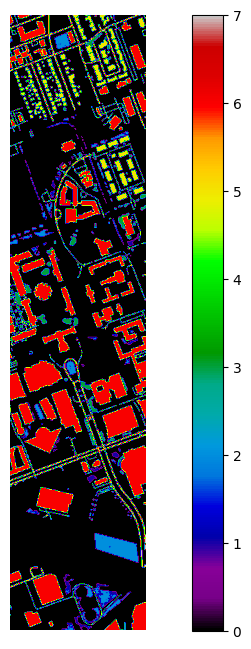

In [ ]:
def plot_gt(data):
  fig = plt.figure(figsize=(12, 8))
  plt.imshow(data,cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_gt(gt)

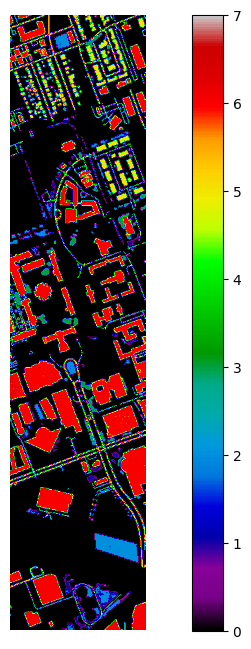

In [ ]:
plot_gt(gt_2)